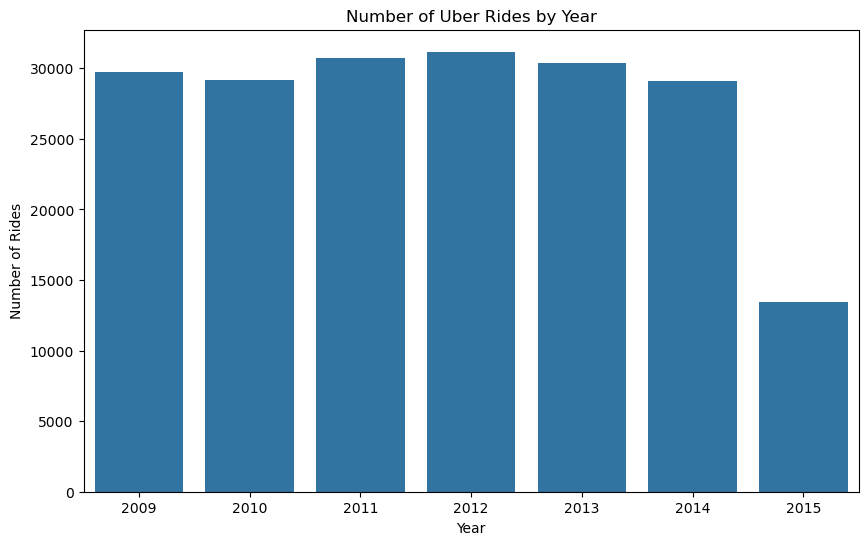

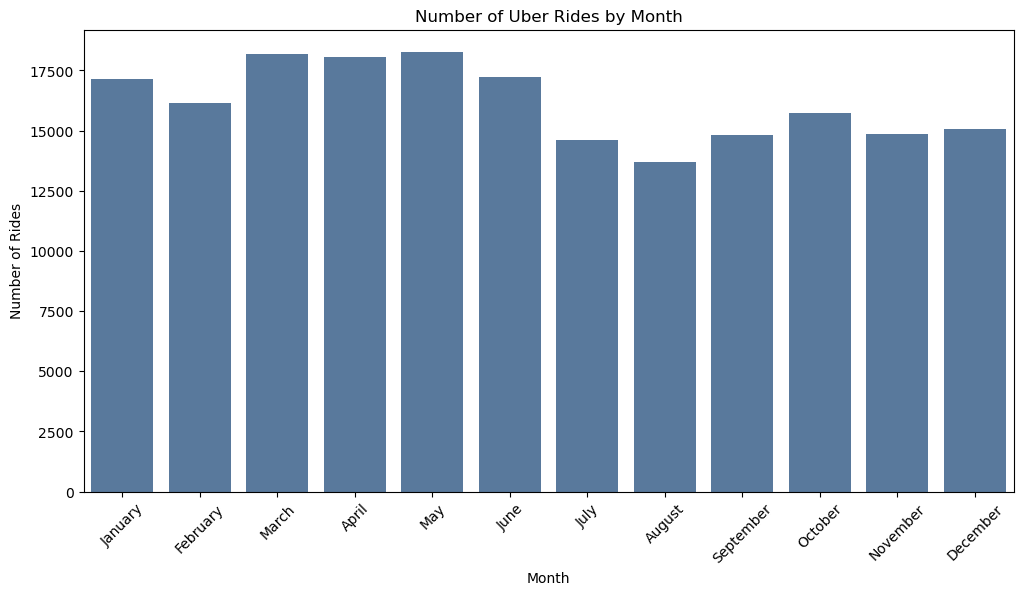

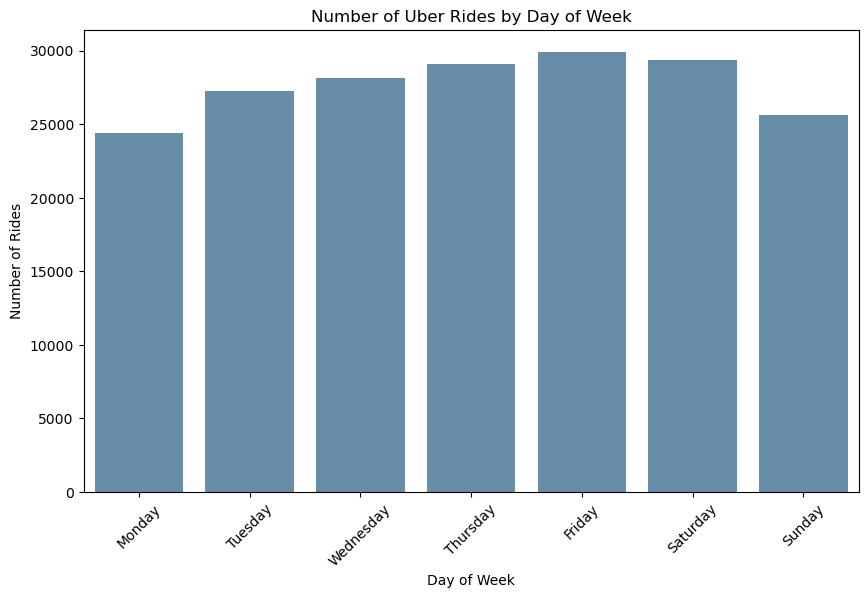

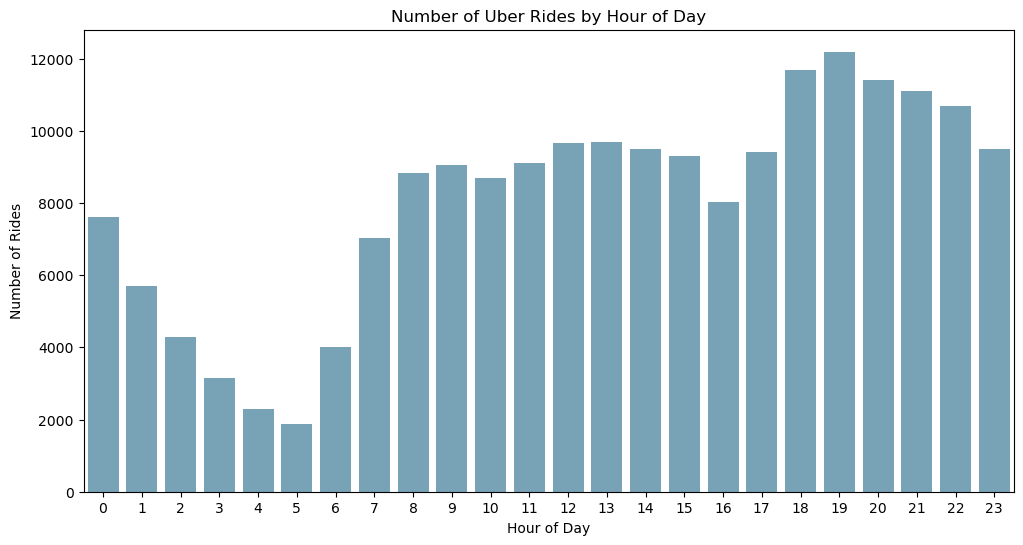

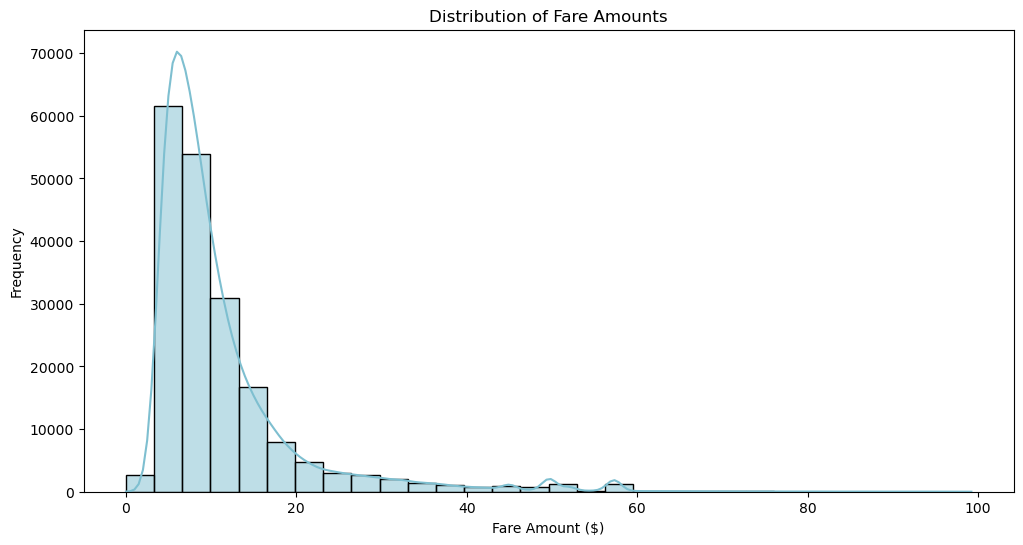

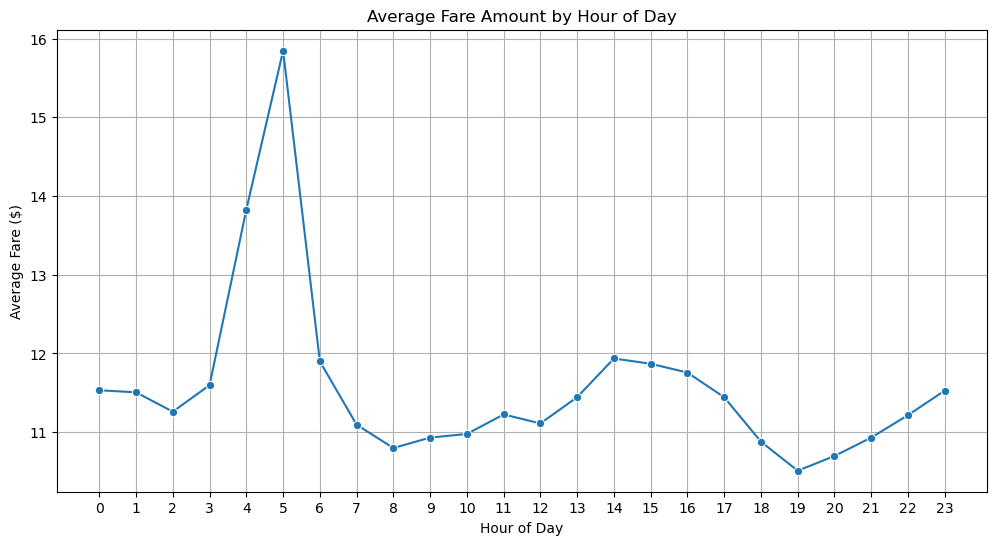

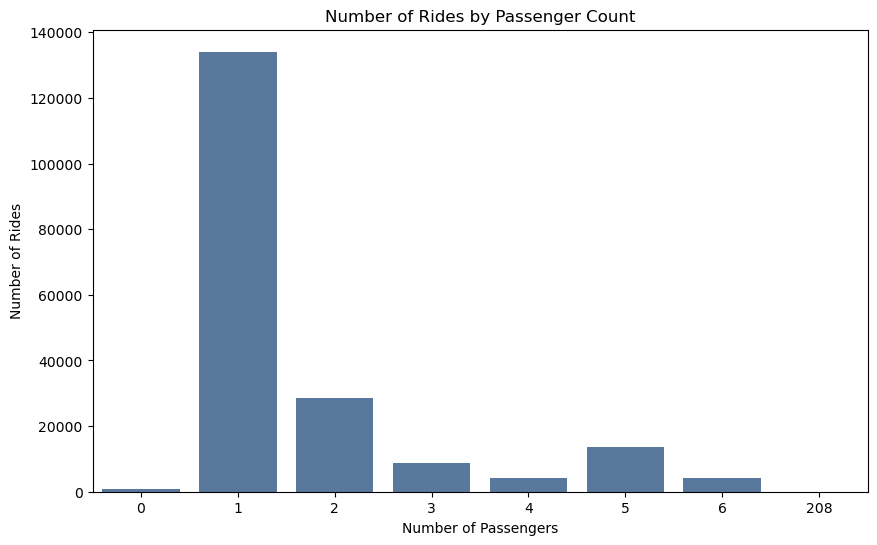

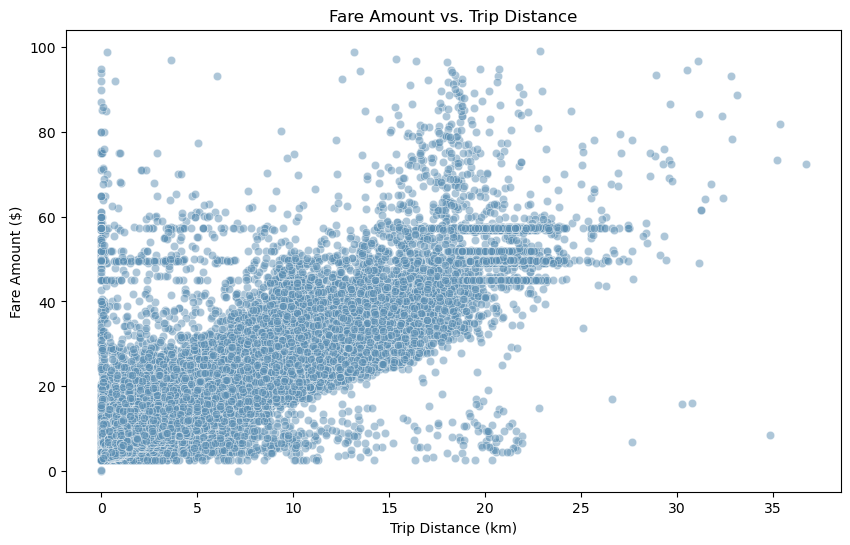

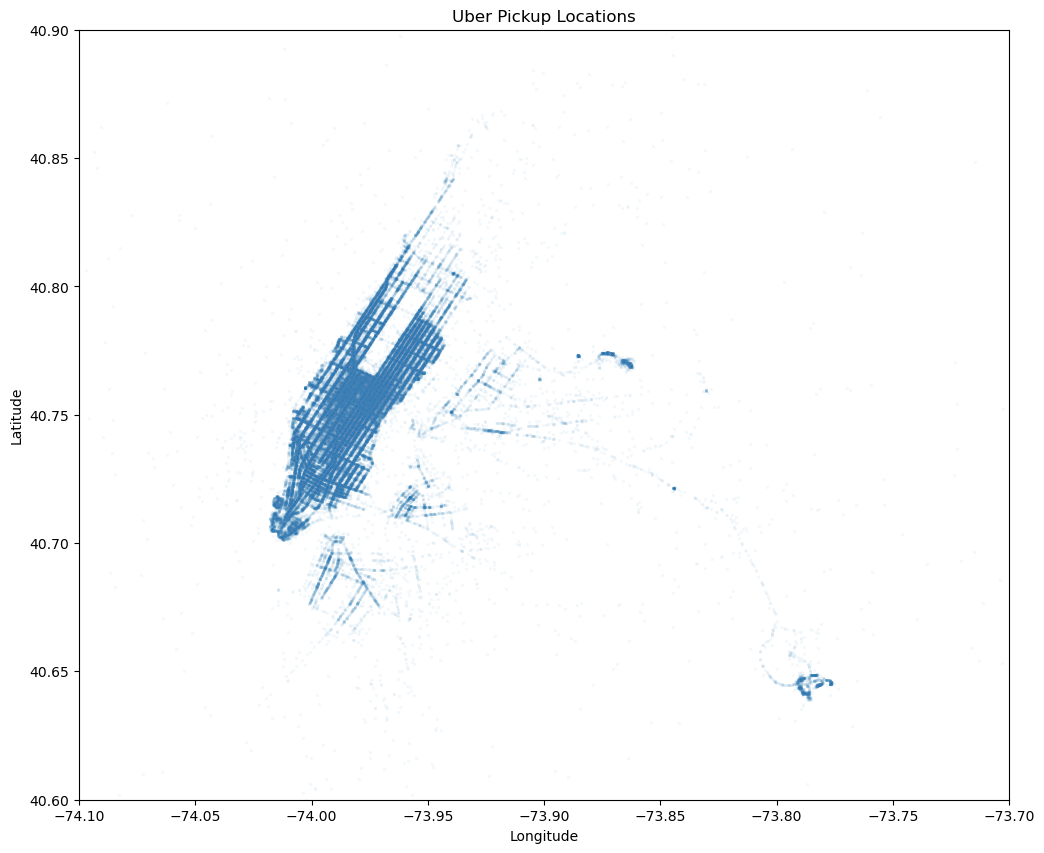

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Load data from CSV file
csv_file_path = "C:\\Users\\KAMAL\\Downloads\\uber.csv"
df = pd.read_csv(csv_file_path)

# Data preparation
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_date'] = df['pickup_datetime'].dt.date
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day'] = df['pickup_datetime'].dt.day_name()
df['pickup_month'] = df['pickup_datetime'].dt.month_name()
df['pickup_year'] = df['pickup_datetime'].dt.year

# Data cleaning
df = df[(df['pickup_latitude'] != 0) & (df['pickup_longitude'] != 0)]

# Calculate distance using Haversine formula
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    return 6371 * c

df['trip_distance_km'] = df.apply(lambda x: haversine(x['pickup_longitude'], x['pickup_latitude'], 
                                                     x['dropoff_longitude'], x['dropoff_latitude']), axis=1)
df['fare_per_km'] = df['fare_amount'] / df['trip_distance_km']
df['fare_per_km'] = df['fare_per_km'].replace([np.inf, -np.inf], np.nan)

# Remove outliers
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 100)]
df = df[(df['trip_distance_km'] > 0) & (df['trip_distance_km'] < 50)]

# Blue color palette
blue_palette = ['#1f77b4', '#4e79a7', '#5c8fb3', '#6da7c1', '#7ebfd0', '#8fd7e0']

# Visualization functions with blue colors
def plot_rides_by_year():
    plt.figure(figsize=(10, 6))
    year_counts = df['pickup_year'].value_counts().sort_index()
    sns.barplot(x=year_counts.index, y=year_counts.values, color='#1f77b4')
    plt.title('Number of Uber Rides by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Rides')
    plt.show()

def plot_rides_by_month():
    plt.figure(figsize=(12, 6))
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
    month_counts = df['pickup_month'].value_counts().reindex(month_order)
    sns.barplot(x=month_counts.index, y=month_counts.values, color='#4e79a7')
    plt.title('Number of Uber Rides by Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Rides')
    plt.xticks(rotation=45)
    plt.show()

def plot_rides_by_day():
    plt.figure(figsize=(10, 6))
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_counts = df['pickup_day'].value_counts().reindex(day_order)
    sns.barplot(x=day_counts.index, y=day_counts.values, color='#5c8fb3')
    plt.title('Number of Uber Rides by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Number of Rides')
    plt.xticks(rotation=45)
    plt.show()

def plot_rides_by_hour():
    plt.figure(figsize=(12, 6))
    hour_counts = df['pickup_hour'].value_counts().sort_index()
    sns.barplot(x=hour_counts.index, y=hour_counts.values, color='#6da7c1')
    plt.title('Number of Uber Rides by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Rides')
    plt.xticks(rotation=0)
    plt.show()

def plot_fare_distribution():
    plt.figure(figsize=(12, 6))
    sns.histplot(df['fare_amount'], bins=30, kde=True, color='#7ebfd0')
    plt.title('Distribution of Fare Amounts')
    plt.xlabel('Fare Amount ($)')
    plt.ylabel('Frequency')
    plt.show()

def plot_avg_fare_by_hour():
    plt.figure(figsize=(12, 6))
    hourly_fare = df.groupby('pickup_hour')['fare_amount'].mean()
    sns.lineplot(x=hourly_fare.index, y=hourly_fare.values, marker='o', color='#1f77b4')
    plt.title('Average Fare Amount by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Fare ($)')
    plt.xticks(range(0, 24))
    plt.grid(True)
    plt.show()

def plot_passenger_counts():
    plt.figure(figsize=(10, 6))
    passenger_counts = df['passenger_count'].value_counts().sort_index()
    sns.barplot(x=passenger_counts.index, y=passenger_counts.values, color='#4e79a7')
    plt.title('Number of Rides by Passenger Count')
    plt.xlabel('Number of Passengers')
    plt.ylabel('Number of Rides')
    plt.show()

def plot_fare_vs_distance():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='trip_distance_km', y='fare_amount', data=df, alpha=0.5, color='#5c8fb3')
    plt.title('Fare Amount vs. Trip Distance')
    plt.xlabel('Trip Distance (km)')
    plt.ylabel('Fare Amount ($)')
    plt.show()

def plot_pickup_locations():
    plt.figure(figsize=(12, 10))
    sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=df, 
                    alpha=0.05, s=5, color='#1f77b4')
    plt.title('Uber Pickup Locations')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.xlim(-74.1, -73.7)
    plt.ylim(40.6, 40.9)
    plt.show()

# Execute all visualizations
plot_rides_by_year()
plot_rides_by_month()
plot_rides_by_day()
plot_rides_by_hour()
plot_fare_distribution()
plot_avg_fare_by_hour()
plot_passenger_counts()
plot_fare_vs_distance()
plot_pickup_locations()